# Loss Function Optimization

In [12]:
"""
TUGAS DEEP LEARNING - Optimasi Loss Function
Nama    : Muhammad Rizqi Subeno
NIM     : 22/495313/PTK/14431
"""
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
data = np.array([[0.2, 0.1], [0.55, 0.15], [0.8, 0.5], [0.95, 0.55]])

In [14]:
def Jm(x, y, m, b):
    return 2*np.sum(x*(y-m*x-b))
def Jmm(x):
    return 2*np.sum(-(x**2))
def Jb(x, y, m, b):
    return 2*np.sum(y-m*x-b)
def Jbb(x):
    return 2*(-len(x))

In [15]:
## Newton-Raphson Method to update m & b value
def nr_method(old_var, learning_rate, fx, der_fx):
    """"
    parameter :
    - old_var           = previous variable
    - learning_rate     = hyperparameter / change rate to get optimal value
    - fx                = value of function 
    - der_fx            = derrivative value of function 
    """
    return old_var-learning_rate*(fx/der_fx)

## Case 1 Simultant

In [16]:
def loss_function_opt(x, y, m_0, b_0, learning_rate=1, max_iter=1000, error_approx_digit = 3):
    """
    parameter : 
    - x                 = x input data point
    - y                 = y output data point
    - m_0               = first initialization of m
    - b_0               = first initializatoin of b
    - learning_rate     = hyperparameter / change rate to get optimal function
    - max_iter          = max iteration
    - error_approx_digit= error tolerance digit 10^n

    output :
    - m_array           = array hchange of m
    - b_array           = array change of b
    - Jm_array          = derrivative of J Function with respect of m
    - Jmm_array         = derrivative of Jm Function with respect of m
    - Jb_array          = derrivative of Jb Function with respect of b
    - Jbb_array         = derrivative of Jb Function with respect of b
    - eam               = error approximmation array of m
    - eab               = error approximation array of b
    """
    m = m_0
    b = b_0
    m_old_array = np.zeros(0)
    m_latest_arr = np.zeros(0)
    b_old_array = np.zeros(0)
    b_latest_arr = np.zeros(0)

    jm_array = np.zeros(0)
    jmm_array = np.zeros(0)
    jb_array = np.zeros(0)
    jbb_array = np.zeros(0)
    eam_array = np.zeros(0)
    eab_array = np.zeros(0)

    for i in range(max_iter):
        jm = Jm(x, y, m, b)
        jmm = Jmm(x)
        jb = Jb(x, y, m, b)
        jbb = Jbb(x)

        jm_array = np.append(jm_array, jm)
        jmm_array = np.append(jmm_array, jmm)
        jb_array = np.append(jb_array, jb)
        jbb_array = np.append(jbb_array, jbb)
        m_old_array = np.append(m_old_array, m)
        b_old_array = np.append(b_old_array, b)

        m = nr_method(m, learning_rate, jm, jmm)
        b = nr_method(b, learning_rate, jb, jbb)

        m_latest_arr = np.append(m_latest_arr, m)
        b_latest_arr = np.append(b_latest_arr, b)
        
        eam = np.abs((m_latest_arr[i]-m_old_array[i])/m_latest_arr[i])
        eab = np.abs((b_latest_arr[i]-b_old_array[i])/b_latest_arr[i])
        eam_array = np.append(eam_array, np.round(eam,6))
        eab_array = np.append(eab_array, np.round(eab,6))

        #check if error under tolerance
        if(eam<10**-error_approx_digit and eab<10**-error_approx_digit):
            print("iteration break at ", i+1)
            # m_array = np.delete(m_array, -1, 0)
            # b_array = np.delete(b_array, -1, 0)
            # jm_array = np.delete(jm_array, -1, 0)
            # jmm_array = np.delete(jmm_array, -1, 0)
            # jb_array = np.delete(jb_array, -1, 0)
            # jbb_array = np.delete(jbb_array, -1, 0)
            break

    return m_old_array, b_old_array, m_latest_arr, b_latest_arr, jm_array, jmm_array, jb_array, jbb_array, eam_array, eab_array

## Case 2 (Optimize alternately)

In [17]:
def loss_function_opt2(x, y, m_0, b_0, learning_rate=1, max_iter=1000, error_approx_digit = 3):
    """
    parameter : 
    - x                 = x input data point
    - y                 = y output data point
    - m_0               = first initialization of m
    - b_0               = first initializatoin of b
    - learning_rate     = hyperparameter / change rate to get optimal function
    - max_iter          = max iteration
    - error_approx_digit= error tolerance digit 10^n

    output :
    - m_array           = array hchange of m
    - b_array           = array change of b
    - Jm_array          = derrivative of J Function with respect of m
    - Jmm_array         = derrivative of Jm Function with respect of m
    - Jb_array          = derrivative of Jb Function with respect of b
    - Jbb_array         = derrivative of Jb Function with respect of b
    - eam               = error approximmation array of m
    - eab               = error approximation array of b
    """
    m = m_0
    b = b_0
    m_old_array = np.zeros(0)
    b_old_array = np.zeros(0)

    m_latest_array = np.zeros(0)
    b_latest_array = np.zeros(0)

    jm_array = np.zeros(0)
    jmm_array = np.zeros(0)
    jb_array = np.zeros(0)
    jbb_array = np.zeros(0)
    eam_array = np.zeros(0)
    eab_array = np.zeros(0)

    Counter = 0
    j = 0
    end_iter = 0
    while(j>=0):
        
        # iteration for optimize m coefficient
        i=0
        for i in range(5):
            jm = Jm(x, y, m , b)
            jmm = Jmm(x)
            jb = Jb(x, y, m , b)
            jbb = Jbb(x)

            jm_array = np.append(jm_array, jm)
            jmm_array = np.append(jmm_array, jmm)
            jb_array = np.append(jb_array, jb)
            jbb_array = np.append(jbb_array, jbb)
            m_old_array = np.append(m_old_array, m)
            b_old_array = np.append(b_old_array, b)

            m = nr_method(m,learning_rate, jm, jmm)
            m_latest_array = np.append(m_latest_array, m)

            eam = np.abs((m_latest_array[-1]-m_old_array[-1])/m_latest_array[-1])
            eam_array = np.append(eam_array, np.round(eam,5))
            
            #check if jm is zero which is m optimized
            #if m not optimized, error approximation b can be printed 
            #if m optimized, error approximation b need update before append error list
            if (np.round(np.abs(jm),5) < 10**-5):
                end_iter = i+1
                break
            else:
                b_latest_array = np.append(b_latest_array, b)
                eab = np.abs((b_latest_array[-1]-b_old_array[-1])/b_latest_array[-1])
                eab_array = np.append(eab_array, np.round(eab,5))
        
        Counter += end_iter

        # update b value before starting estimate
        b = nr_method(b, learning_rate, jb, jbb)
        b_latest_array = np.append(b_latest_array, b)
        eab = np.abs((b_latest_array[-1]-b_old_array[-1])/b_latest_array[-1])
        eab_array = np.append(eab_array, np.round(eab,5))
        
        # iteration for optimize b coefficient
        i=0
        while True:
            jm = Jm(x, y, m , b)
            jmm = Jmm(x)
            jb = Jb(x, y, m , b)
            jbb = Jbb(x)

            jm_array = np.append(jm_array, jm)
            jmm_array = np.append(jmm_array, jmm)
            jb_array = np.append(jb_array, jb)
            jbb_array = np.append(jbb_array, jbb)
            m_old_array = np.append(m_old_array, m)
            b_old_array = np.append(b_old_array, b)

            b = nr_method(b,learning_rate, jb, jbb)
            b_latest_array = np.append(b_latest_array, b)
            
            eab = np.abs((b_latest_array[-1]-b_old_array[-1])/b_latest_array[-1])
            eab_array = np.append(eab_array, np.round(eab,5))

            #check if jb is zero which is b optimized
            #if b not optimized, error approximation m can be printed 
            #if b optimized, error approximation m need update before append error list
            if (np.round(np.abs(jb),5) < 10**-5):
                end_iter = i+1
                break
            else:
                m_latest_array = np.append(m_latest_array, m)
                eam = np.abs((m_latest_array[-1]-m_old_array[-1])/m_latest_array[-1])
                eam_array = np.append(eam_array, np.round(eam,5))
        
        Counter += end_iter

        # update m value before starting estimate
        m = nr_method(m, learning_rate, jm, jmm)
        m_latest_array = np.append(m_latest_array, m)
        eam = np.abs((m_latest_array[-1]-m_old_array[-1])/m_latest_array[-1])
        eam_array = np.append(eam_array, np.round(eam,5))


        if (eam < 10**-error_approx_digit and eab < 10**-error_approx_digit) or Counter>max_iter:
            print("iteration break at ",Counter)
            break

        j += 1
       
    return m_old_array, b_old_array, m_latest_array, b_latest_array, jm_array, jmm_array, jb_array, jbb_array, eam_array, eab_array

## Case 1 Simultant

In [18]:
m_old_arr, b_old_arr, m_latest_arr, b_latest_arr, jm, jmm, jb, jbb, eam, eab = loss_function_opt(data[:,0], data[:,1], 0, 1, 1, 1000, 3)

df = pd.DataFrame({"m baru": np.round(m_latest_arr,4), "m lama": np.round(m_old_arr,4), "jm":np.round(jm,4), "jmm":jmm, "eam":eam, "b baru": np.round(b_latest_arr,4), "b lama": np.round(b_old_arr,4), "jb":np.round(jb,4), "jbb":jbb, "eab":eab})

# set starting point 1
df.index += 1
# print all values
with pd.option_context('display.max_rows', None):  # more options can be specified also
    display(df)

iteration break at  96


,m baru,m lama,jm,jmm,eam,b baru,b lama,jb,jbb,eab
1,-0.7825,0.0000,-2.9500,-3.77,1.000000,0.3250,1.0000,-5.4000,-8.0,2.076923
2,0.1127,-0.7825,3.3750,-3.77,7.941176,0.8141,0.3250,3.9125,-8.0,0.600766
3,-0.5359,0.1127,-2.4453,-3.77,1.210366,0.2545,0.8141,-4.4761,-8.0,2.198124
4,0.2062,-0.5359,2.7976,-3.77,3.599155,0.6599,0.2545,3.2431,-8.0,0.614288
5,-0.3315,0.2062,-2.0269,-3.77,1.622007,0.1961,0.6599,-3.7103,-8.0,2.364594
6,0.2836,-0.3315,2.3189,-3.77,2.168653,0.5322,0.1961,2.6882,-8.0,0.631434
7,-0.1620,0.2836,-1.6801,-3.77,2.750528,0.1477,0.5322,-3.0755,-8.0,2.602354
8,0.3478,-0.1620,1.9222,-3.77,1.465812,0.4263,0.1477,2.2283,-8.0,0.653438
9,-0.0216,0.3478,-1.3927,-3.77,17.122311,0.1076,0.4263,-2.5493,-8.0,2.961609
10,0.4011,-0.0216,1.5933,-3.77,1.053795,0.3385,0.1076,1.8471,-8.0,0.682114


## Verify with plotting graph

y = 0.6588x + -0.0867


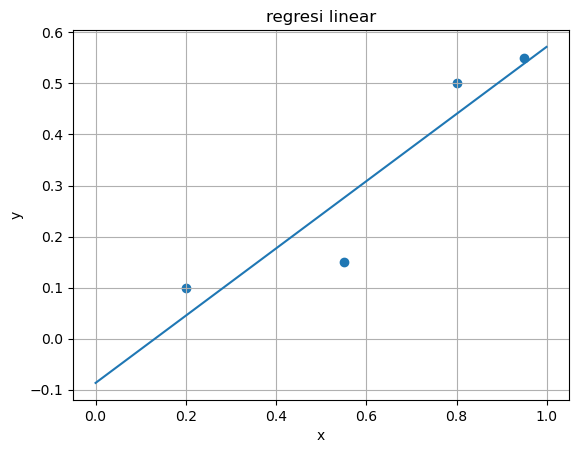

In [19]:
m = m_latest_arr[-1]
b = b_latest_arr[-1]

x = np.arange(0,1,0.001)
y = m*x+b
print("y = {}x + {}".format(round(m,4),round(b,4)))

plt.scatter(data[:,0],data[:,1])
plt.plot(x,y)
plt.title("regresi linear")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

## Case 2 (Optimize Alternately)

In [25]:
m_old_arr, b_old_arr, m_latest_arr, b_latest_arr, jm, jmm, jb, jbb, eam, eab = loss_function_opt2(data[:,0], data[:,1], 0, 1, 1, 100, 3)

df = pd.DataFrame({"m baru": np.round(m_latest_arr,4), "m lama": np.round(m_old_arr,4), "jm":np.round(jm,4), "jmm":jmm, "eam":eam, "b baru": np.round(b_latest_arr,4), "b lama": np.round(b_old_arr,4), "jb":np.round(jb,4), "jbb":jbb, "eab":eab})

# set starting point 1
df.index += 1
# print all values
with pd.option_context('display.max_rows', None):  # more options can be specified also
    display(df)

iteration break at  66


,m baru,m lama,jm,jmm,eam,b baru,b lama,jb,jbb,eab
1,-0.7825,0.0000,-2.9500,-3.77,1.00000,1.0000,1.0000,-5.4000,-8.0,0.00000
2,-0.7825,-0.7825,0.0000,-3.77,0.00000,0.8141,1.0000,-1.4875,-8.0,0.22841
3,-0.5359,-0.7825,0.9297,-3.77,0.46019,0.8141,0.8141,0.0000,-8.0,0.00000
4,-0.5359,-0.5359,0.0000,-3.77,0.00000,0.6599,0.8141,-1.2330,-8.0,0.23355
5,-0.3315,-0.5359,0.7706,-3.77,0.61669,0.6599,0.6599,-0.0000,-8.0,0.00000
6,-0.3315,-0.3315,0.0000,-3.77,0.00000,0.5322,0.6599,-1.0221,-8.0,0.24007
7,-0.1620,-0.3315,0.6388,-3.77,1.04576,0.5322,0.5322,-0.0000,-8.0,0.00000
8,-0.1620,-0.1620,-0.0000,-3.77,0.00000,0.4263,0.5322,-0.8472,-8.0,0.24844
9,-0.0216,-0.1620,0.5295,-3.77,6.50996,0.4263,0.4263,0.0000,-8.0,0.00000
10,-0.0216,-0.0216,-0.0000,-3.77,0.00000,0.3385,0.4263,-0.7023,-8.0,0.25934


## Verify with Plotting Graph (Case 2)

y = 0.656x + -0.0846


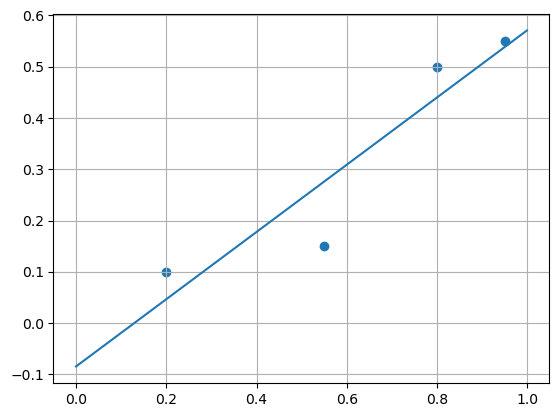

In [24]:
m = m_latest_arr[-1]
b = b_latest_arr[-1]

x = np.arange(0,1,0.001)
y = m*x+b
print("y = {}x + {}".format(round(m,4),round(b,4)))

plt.scatter(data[:,0],data[:,1])
plt.plot(x,y)
plt.grid(True)